In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 확인

In [2]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data 확인
# train_path = 'data/train_dataset.csv'
# test_path = 'data/test_dataset.csv'
train_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.12_미니프로젝트5차_3_5일차 실습자료/Kaggle_Competition/data/train_dataset.csv'
test_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.12_미니프로젝트5차_3_5일차 실습자료/Kaggle_Competition/data/test_dataset.csv'

train_data = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)

train_data.shape, x_test.shape

((5881, 52), (1471, 50))

In [4]:
train_data

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity,Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,-0.014314,0.198600,-0.073666,0.113098,-0.058315,0.354270,...,-0.996607,-0.999969,-0.985141,-1.000000,-0.975435,-0.993965,-0.032207,-0.042494,STANDING,4
1,-0.098163,-0.052478,0.464764,0.075947,0.004456,0.130310,0.401913,0.512569,0.011987,0.503466,...,-0.992681,-0.999941,-0.988982,-1.000000,-0.978534,-0.994733,-0.246705,-0.062899,LAYING,3
2,-0.108717,-0.226718,0.301165,0.079530,0.014504,0.111340,0.263556,0.562730,0.314589,0.132061,...,-0.999971,-0.999976,-0.991535,-1.000000,-0.991953,-0.992200,0.388765,0.000265,STANDING,4
3,-0.150354,0.549363,-0.384117,-0.309509,-0.201293,0.411714,-0.372620,0.288349,-0.259441,-0.711894,...,-0.876509,-0.969331,-0.387366,0.323260,-0.479590,-0.889227,0.050888,-0.255125,WALKING,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.266815,-0.248696,-0.628852,0.095282,-0.240501,-0.305964,...,-0.960097,-0.990292,-0.220963,0.446385,-0.433366,-0.810446,-0.013902,-0.044344,WALKING_DOWNSTAIRS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.082392,-0.008733,0.180157,0.041011,0.173103,-0.001160,0.419680,...,-0.997983,-0.999967,-0.987428,-1.000000,-0.981119,-0.983765,0.052914,-0.034888,SITTING,5
5877,-0.105174,0.275170,-0.191391,-0.108297,0.050577,0.168315,-0.313497,-0.067457,-0.006740,-0.260559,...,-0.951267,-0.982422,-0.561358,0.241367,-0.415217,-0.845447,0.325461,0.721718,WALKING_UPSTAIRS,1
5878,-0.107440,-0.025156,0.407618,0.070742,0.011347,0.222424,0.259452,0.497603,0.187073,0.155540,...,-0.998177,-0.999920,-0.989684,-1.000000,-0.991452,-0.989032,0.362439,0.060173,LAYING,3
5879,-0.121001,0.686123,-0.606018,-0.085843,-0.039197,0.499451,-0.628068,0.337687,-0.037529,-0.229386,...,-0.687973,-0.940509,-0.465531,0.323401,-0.504324,-0.867993,0.031915,0.260880,WALKING_UPSTAIRS,1


In [5]:
dict(train_data.groupby(['Activity', 'Activity_dynamic']).count().index)

{'LAYING': 3,
 'SITTING': 5,
 'STANDING': 4,
 'WALKING': 0,
 'WALKING_DOWNSTAIRS': 2,
 'WALKING_UPSTAIRS': 1}

- Dynamic : 0, 1, 2 (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS)
- Static : 3, 4, 5 (LAYING, STANDING, SITTING)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tBodyAcc-mean()-Z                   5881 non-null   float64
 1   tBodyAcc-arCoeff()-X,2              5881 non-null   float64
 2   tBodyAcc-arCoeff()-Y,1              5881 non-null   float64
 3   tBodyAccJerk-mean()-X               5881 non-null   float64
 4   tBodyAccJerk-mean()-Y               5881 non-null   float64
 5   tBodyAccJerk-arCoeff()-X,2          5881 non-null   float64
 6   tBodyAccJerk-arCoeff()-Y,1          5881 non-null   float64
 7   tBodyAccJerk-arCoeff()-Y,3          5881 non-null   float64
 8   tBodyAccJerk-arCoeff()-Z,1          5881 non-null   float64
 9   tBodyGyro-arCoeff()-Z,3             5881 non-null   float64
 10  tBodyGyroJerk-mean()-Y              5881 non-null   float64
 11  tBodyGyroJerk-max()-Y               5881 no

In [7]:
# 결측치는 없음
train_data.isnull().sum().sum()

0

In [8]:
temp = train_data.drop(['Activity', 'Activity_dynamic'], axis=1)
temp.describe()

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,-0.109396,0.104057,-0.026011,0.080299,0.008176,0.163106,-0.069778,0.172689,-0.030393,-0.004303,...,-0.937840,-0.929024,-0.899277,-0.954336,-0.677162,-0.343444,-0.693150,-0.870934,0.126955,0.008524
std,0.058373,0.247142,0.257119,0.181594,0.162113,0.193516,0.271037,0.241267,0.275595,0.270987,...,0.126716,0.141042,0.159382,0.111003,0.370775,0.670330,0.333617,0.194308,0.249176,0.339730
min,-1.000000,-0.963099,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.947304,...,-0.999989,-1.000000,-0.999997,-1.000000,-0.999499,-1.000000,-1.000000,-1.000000,-0.965725,-0.976580
25%,-0.121051,-0.081190,-0.221080,0.064653,-0.016136,0.041425,-0.277762,0.016593,-0.237342,-0.194995,...,-0.999574,-0.999489,-0.994933,-0.999943,-0.988953,-1.000000,-0.984051,-0.993999,-0.021610,-0.122361
50%,-0.108781,0.071405,-0.040569,0.076009,0.010773,0.167299,-0.082685,0.182508,-0.007584,0.015706,...,-0.998168,-0.997816,-0.974734,-0.998315,-0.948335,-0.723642,-0.882425,-0.975287,0.133887,0.010278
75%,-0.098163,0.278599,0.170047,0.092189,0.032465,0.284680,0.147228,0.341852,0.186199,0.197006,...,-0.923564,-0.914343,-0.860368,-0.954544,-0.373468,0.348041,-0.442004,-0.806804,0.288944,0.154985
max,1.000000,0.978449,1.000000,1.000000,1.000000,0.950268,1.000000,0.957768,0.925207,1.000000,...,1.000000,1.000000,0.794498,1.000000,1.000000,1.000000,1.000000,1.000000,0.946700,1.000000


<Axes: >

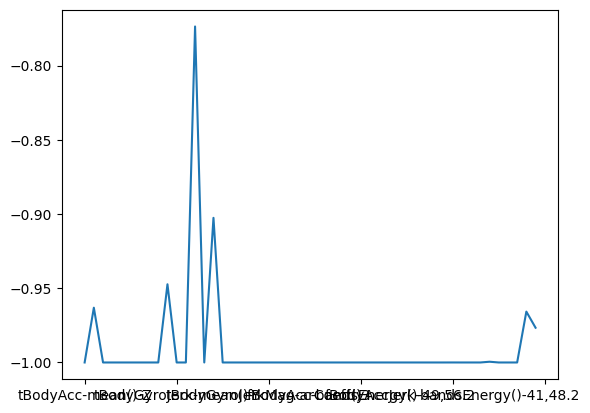

In [9]:
temp.describe().loc["min"].plot()

<Axes: >

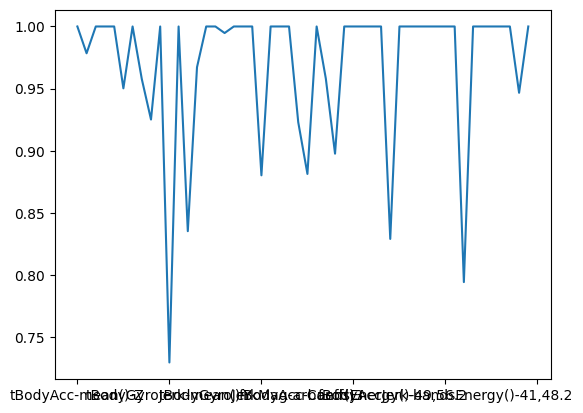

In [10]:
temp.describe().loc["max"].plot()

- 대부분 -1 ~ 1의 분포이지만, Scaler도 사용해본다.

In [11]:
# x, y 분리
x = train_data.drop(['Activity', 'Activity_dynamic'], axis=1)
y = train_data['Activity_dynamic']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

mm_scaler.fit(x)
std_scaler.fit(x)

x_mm = mm_scaler.transform(x)
x_std = std_scaler.transform(x)

x_test_mm = mm_scaler.transform(x_test)
x_test_std = std_scaler.transform(x_test)

In [12]:
train_data['Activity'].value_counts()

LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64

<Axes: >

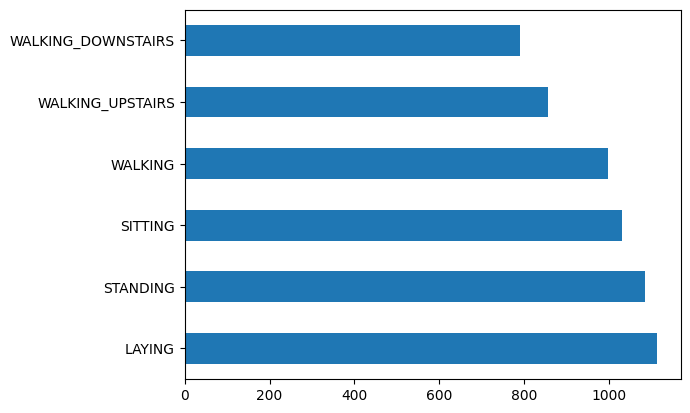

In [13]:
train_data['Activity'].value_counts().plot(kind='barh')

- 분포가 살짝 불균형 함을 확인 -> SMOTE, BorderLineSMOTE 등을 사용해보자

# 모델링

In [14]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

my_seed = 42
my_seed_everywhere(my_seed)

# mljar 사용해보기

In [15]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 동적 정적 구분 후 세부 분류

In [35]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
# x, y 분리
x = train_data.drop(['Activity', 'Activity_dynamic'], axis=1)
y = train_data['Activity_dynamic']

## is_dynamic 분류

In [17]:
train_data['is_dynamic'] = np.where(train_data['Activity_dynamic'] < 3, 1, 0)

In [18]:
train_data.groupby(['Activity', 'is_dynamic']).count().index

MultiIndex([(            'LAYING', 0),
            (           'SITTING', 0),
            (          'STANDING', 0),
            (           'WALKING', 1),
            ('WALKING_DOWNSTAIRS', 1),
            (  'WALKING_UPSTAIRS', 1)],
           names=['Activity', 'is_dynamic'])

In [33]:
y_is_dy = train_data['is_dynamic'].values

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

my_seed_everywhere(42)
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)
# 검증하기
cv_score = cross_val_score(model, x, y_is_dy, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[1.         0.99659864 1.         1.         1.         0.99829932
 1.         0.99829932 1.         1.        ]
평균: 0.9993197278911564
표준편차: 0.0011281036701889027


In [45]:
# model1은 is_dynamic 분류 모델
my_seed_everywhere(42)
model1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)
model1.fit(x, y_is_dy)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

## 정적 Class 분류

In [19]:
static_data = train_data[train_data['is_dynamic'] == 0].reset_index(drop=True)
static_data['Activity_dynamic'] = static_data['Activity_dynamic'] - 3
static_data = static_data.drop(['Activity', 'is_dynamic'], axis=1)

In [20]:
x = static_data.drop('Activity_dynamic', axis=1).values
y = static_data['Activity_dynamic'].values

x_tr_st, x_val_st, y_tr_st, y_val_st = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
%%time
from supervised.automl import AutoML
automl2_1 = AutoML(mode='Compete')
automl2_1.fit(x_tr_st, y_tr_st)

AutoML directory: AutoML_2
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.978282 trained in 0.77 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree logloss 1.015686 trained in 5.1 seconds
2_DecisionTree logloss 1.011531 trained in 5.68 seconds
3_DecisionTree logloss 1.01

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto'

21_LightGBM_KMeansFeatures logloss 0.711026 trained in 62.05 seconds
* Step insert_random_feature will try to check up to 1 model
21_LightGBM_RandomFeature logloss 0.69794 trained in 152.34 seconds
Drop features ['feature_44', 'feature_8', 'feature_30', 'feature_46', 'feature_34', 'random_feature', 'feature_33']
* Step features_selection will try to check up to 6 models
21_LightGBM_SelectedFeatures logloss 0.690382 trained in 45.14 seconds
14_Xgboost_SelectedFeatures logloss 0.706922 trained in 35.32 seconds
7_Default_CatBoost_SelectedFeatures logloss 0.711007 trained in 82.17 seconds
* Step hill_climbing_1 will try to check up to 36 models
69_LightGBM_SelectedFeatures logloss 0.699242 trained in 48.89 seconds
70_LightGBM logloss 0.707703 trained in 56.18 seconds
71_LightGBM_GoldenFeatures logloss 0.709356 trained in 66.19 seconds
72_Xgboost_SelectedFeatures logloss 0.700945 trained in 42.17 seconds
* Step hill_climbing_2 will try to check up to 35 models
73_LightGBM_SelectedFeatures l

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


* Step boost_on_errors will try to check up to 1 model
21_LightGBM_SelectedFeatures_BoostOnErrors logloss 0.698419 trained in 42.44 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.665725 trained in 30.73 seconds
* Step stack will try to check up to 39 models
21_LightGBM_SelectedFeatures_Stacked logloss 0.674742 trained in 47.15 seconds
72_Xgboost_SelectedFeatures_Stacked logloss 0.677179 trained in 50.45 seconds
7_Default_CatBoost_SelectedFeatures_Stacked logloss 0.674728 trained in 96.2 seconds
40_RandomForest_Stacked logloss 0.674113 trained in 250.19 seconds
49_ExtraTrees_Stacked logloss 0.67195 trained in 59.19 seconds
8_Default_NeuralNetwork_Stacked logloss 0.777955 trained in 31.21 seconds
74_LightGBM_SelectedFeatures_Stacked not trained. Stop training after the first fold. Time needed to train on the first fold 5.0 seconds. The time estimate for training on all folds is larger than total_time_limit.
14_Xgboost_SelectedFeatures_Stacked not trained. Stop

AutoML(mode='Compete')

In [23]:
predictions = automl2_1.predict_all(x_val_st)
print(predictions.head())
print("Validation accuracy :", accuracy_score(y_val_st, predictions['label']))

   prediction_0  prediction_1  prediction_2  label
0      0.132331      0.400955      0.466714      2
1      0.541358      0.175977      0.282665      0
2      0.177533      0.185772      0.636695      2
3      0.277918      0.366358      0.355725      1
4      0.789396      0.095947      0.114657      0
Validation accuracy : 0.7109737248840804


## 동적 Class 분류

In [24]:
dynamic_data = train_data[train_data['is_dynamic'] == 1].reset_index(drop=True)
dynamic_data = dynamic_data.drop(['Activity', 'is_dynamic'], axis=1)

x = dynamic_data.drop('Activity_dynamic', axis=1).values
y = dynamic_data['Activity_dynamic'].values

x_tr_dy, x_val_dy, y_tr_dy, y_val_dy = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
%%time
from supervised.automl import AutoML
automl2_2 = AutoML(mode='Compete')
automl2_2.fit(x_tr_dy, y_tr_dy)

AutoML directory: AutoML_3
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.774684 trained in 3.0 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree logloss 0.885512 trained in 18.05 seconds
2_DecisionTree logloss 0.923618 trained in 16.01 seconds
3_DecisionTree logloss 0.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto'

31_CatBoost_KMeansFeatures logloss 0.418468 trained in 201.46 seconds
Not enough time to perform features selection. Skip
Time needed for features selection ~ 677.0 seconds
Please increase total_time_limit to at least (6826 seconds) to have features selection
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 33 models
68_CatBoost_GoldenFeatures logloss 0.393977 trained in 179.08 seconds
69_CatBoost logloss 0.400922 trained in 145.59 seconds
70_CatBoost logloss 0.387695 trained in 190.45 seconds
* Step hill_climbing_2 will try to check up to 34 models
71_CatBoost logloss 0.394933 trained in 107.41 seconds
72_CatBoost logloss 0.391077 trained in 302.86 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Skip boost_on_errors because of the time limit.
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.357829 trained in 13.43 seconds
* Step stack will try to check up to 28 models
70_CatBoost_Stacked logloss 0.352013 trained in 131.39 seconds
21_LightGBM_Stacked logloss 0.347537 trained in 50.12 seconds
12_Xgboost_Stacked logloss 0.355076 trained in 87.59 seconds
40_RandomForest_Stacked logloss 0.367721 trained in 146.34 seconds
49_ExtraTrees_Stacked not trained. Stop training after the first fold. Time needed to train on the first fold 1.0 seconds. The time estimate for training on all folds is larger than total_time_limit.
58_NeuralNetwork_Stacked logloss 0.420272 trained in 37.43 seconds
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked logloss 0.339463 trained in 17.32 seconds
AutoML fit time: 3653.34 seconds
AutoML best model: Ensemble_Stacked
CPU times: user 1h 8min 57s, sys: 13min 37s, total: 1h 22min 35s
Wall time: 1h 53s


AutoML(mode='Compete')

In [26]:
predictions = automl2_2.predict_all(x_val_dy)
print(predictions.head())
print("Validation accuracy :", accuracy_score(y_val_dy, predictions['label']))

   prediction_0  prediction_1  prediction_2  label
0      0.038840      0.850274      0.110886      1
1      0.611995      0.312185      0.075820      0
2      0.135154      0.853787      0.011060      1
3      0.021453      0.140784      0.837763      2
4      0.016314      0.024138      0.959549      2
Validation accuracy : 0.8716981132075472


# predict

In [30]:
automl2_1.predict(static_data.drop('Activity_dynamic', axis=1).values)

array([1, 0, 1, ..., 1, 0, 2], dtype=int32)

In [69]:
def my_model_predict(x):
    """
    params:
        x : DataFrame. Features
    ret:
        y_pred : numpy array

    model1 : 정적 동적 구분 
    automl2-1 : 정적으로 구분한 것을 세부 Class 분류 
    automl2-1 : 동적으로 구분한 것을 세부 Class 분류 
    """
    # 정적, 동적 예측 결과 저장
    x['is_dynamic'] = model1.predict(x)

    # 정적과 동적 예측 결과에 따라 나누기
    # reset_index로 원래의 index 를 column으로 빼서 나중에 concat 후 사용
    temp_static = x[x['is_dynamic'] == 0].reset_index()
    temp_dynamic = x[x['is_dynamic'] == 1].reset_index()

    # 정적, 동적 별로 각 Class 예측
    # 정적 Class 는 결과값 + 3!!
    temp_static['label'] = automl2_1.predict( temp_static.drop(['is_dynamic', 'index'], axis=1).values ) + 3
    temp_dynamic['label'] = automl2_2.predict( temp_dynamic.drop(['is_dynamic', 'index'], axis=1).values )

    # 각 예측 결과를 합치고, index로 정렬
    result_df = pd.concat([temp_static, temp_dynamic], axis=0).sort_values(by='index').set_index('index')

    # y_pred 뽑기
    y_pred = result_df['label'].values

    x.drop('is_dynamic', axis=1, inplace=True)

    return y_pred

In [70]:
y_pred = my_model_predict(x_test)
y_pred

array([5, 4, 0, ..., 2, 3, 2], dtype=int32)

In [71]:
result = pd.DataFrame(y_pred, columns=['Activity']).reset_index(names='ID')
result

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,3
1467,1467,4
1468,1468,2
1469,1469,3


In [72]:
save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.12_미니프로젝트5차_3_5일차 실습자료/Kaggle_Competition/'
result.to_csv(save_path + "mljar.csv", index=False)

In [73]:
temp = pd.read_csv(save_path + 'submssion_5.csv')
(temp['Activity'] != result['Activity']).sum()

182